# AS 3.1 Moonlander Deep Q-learning
**By Etc.** _(Joris Heemskerk & Bas de Blok)_

This notebook contains all the awnsers to your most burning questions!

In [6]:
from agent import Agent
from doubleAgent import DoubleAgent
from policy import Policy
from memory import Memory
from qNetwork import QNetwork

import os
import torch
import gymnasium as gym
from torch import nn

## 1. Deep Q-learning

### 1.1 Settings:

In [ ]:
# Policy data
START_EPSILON = 1
DECAY = 0.9996
FINAL_EPSILON = 0.01

# Memory data
MEMORY_SIZE = 32_000

# Training settings
NUMBER_OF_EPISODES = 500
NUMBER_OF_EPISODES_TO_AVERAGE = 100
THRESHOLD_STOP_CONDITION = 200
DISCOUNT_GAMMA = 0.99
MEMORY_BATCH_SIZE_PER_TRAINING_STEP = 64
STEP_LIMIT_PER_RUN = 2_000
TAU = 0.1
LOSS_FUNCTION = nn.MSELoss()
OPTIMIZER = torch.optim.Adam
NN_SEED = 42

### 1.2. Training graph

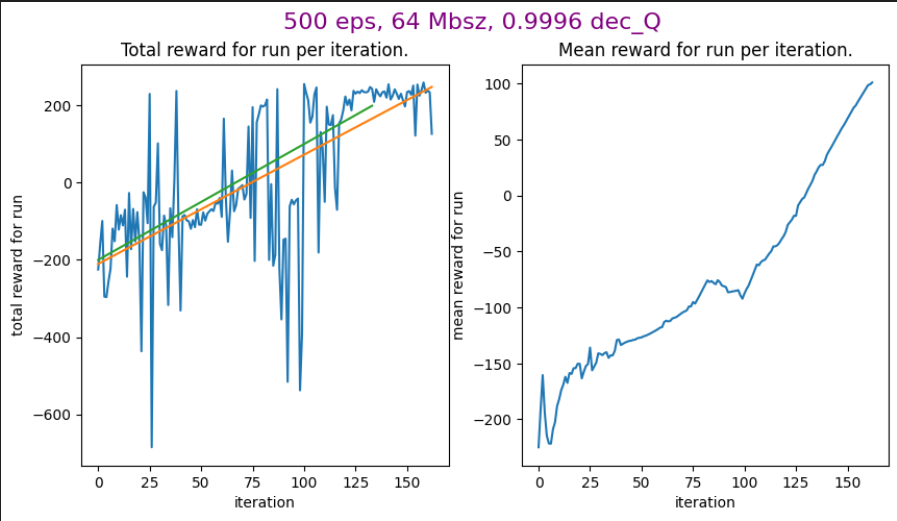

### 1.3. Running the agent

In [ ]:
memory = Memory(max_size=MEMORY_SIZE)
policy = Policy(network=QNetwork(), optimizer=OPTIMIZER, epsilon=FINAL_EPSILON, decay=DECAY)
try:
    policy.load(f"saved_models/after_{NUMBER_OF_EPISODES}-eps_{MEMORY_BATCH_SIZE_PER_TRAINING_STEP}-Mbsz_{DECAY}-dec_Q")
except Exception as e:
    raise e("This model has not been run before. Please see `AS-3_1.ipynb` to train a model. This notebook is just for demonstration purposses.")
agent = Agent(policy=policy, memory=memory)

env = gym.make("LunarLander-v2", render_mode="human")
print(f"Reward: {agent.run(env)}")
env.close()


## 2. DOUBLE D's!!
(also known as Double Deep Q-learning)

### 2.1 Settings:

In [7]:
# Policy data
DQ_START_EPSILON = 1
DQ_DECAY = 0.9996
DQ_FINAL_EPSILON = 0.01

# Memory data
DQ_MEMORY_SIZE = 32_000

# Training settings
DQ_NUMBER_OF_EPISODES = 500
DQ_NUMBER_OF_EPISODES_TO_AVERAGE = 100
DQ_THRESHOLD_STOP_CONDITION = 200
DQ_DISCOUNT_GAMMA = 0.99
DQ_MEMORY_BATCH_SIZE_PER_TRAINING_STEP = 64
DQ_STEP_LIMIT_PER_RUN = 2_000
DQ_TAU = 0.1
DQ_LOSS_FUNCTION = nn.MSELoss()
DQ_OPTIMIZER = torch.optim.Adam
DQ_NN_SEED = 42

### 1.2. Training graph

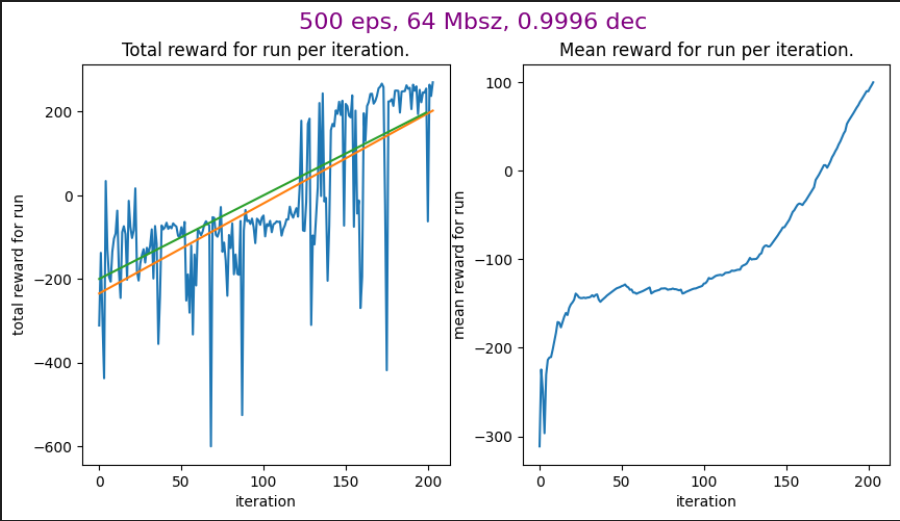

### 1.3. Running the agent

In [8]:
dq_memory = Memory(max_size=DQ_MEMORY_SIZE)
dq_policy = Policy(network=QNetwork(), optimizer=DQ_OPTIMIZER, epsilon=DQ_FINAL_EPSILON, decay=DQ_DECAY)
dq_policy_prime = Policy(network=QNetwork(), optimizer=DQ_OPTIMIZER, epsilon=DQ_FINAL_EPSILON, decay=DQ_DECAY)
try:
    dq_policy.load(f"saved_models/after_{DQ_NUMBER_OF_EPISODES}-eps_{DQ_MEMORY_BATCH_SIZE_PER_TRAINING_STEP}-Mbsz_{DQ_DECAY}-dec_DQ")
except Exception as e:
    raise e("This model has not been run before. Please see `AS-3_1.ipynb` to train a model. This notebook is just for demonstration purposses.")
dq_agent = DoubleAgent(policy=dq_policy, target_policy=dq_policy_prime, memory=dq_memory, tau=DQ_TAU)

dq_env = gym.make("LunarLander-v2", render_mode="human")
print(f"Reward: {dq_agent.run(dq_env)}")
dq_env.close()

Using cpu device

Using cpu device

Reward: 255.82664153210956


## 3. Other Q-Learning
Below we see an example of a failed Q-learning algoritm run

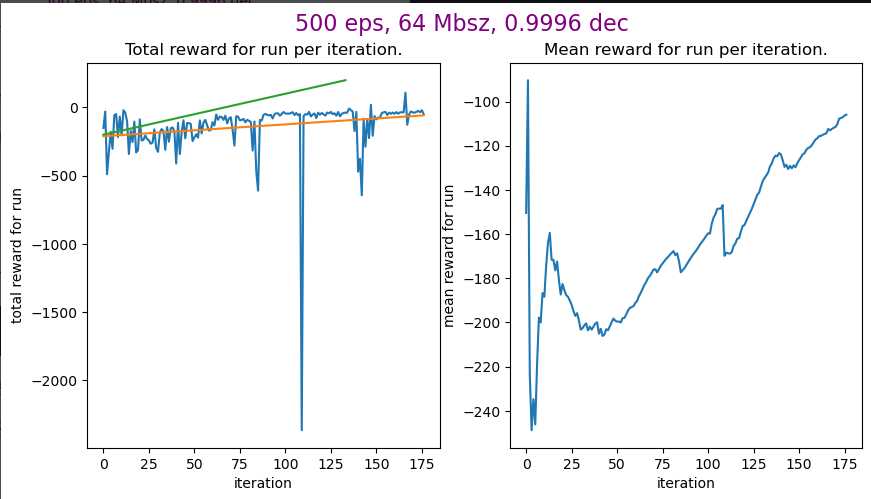

Then another one that succeeded

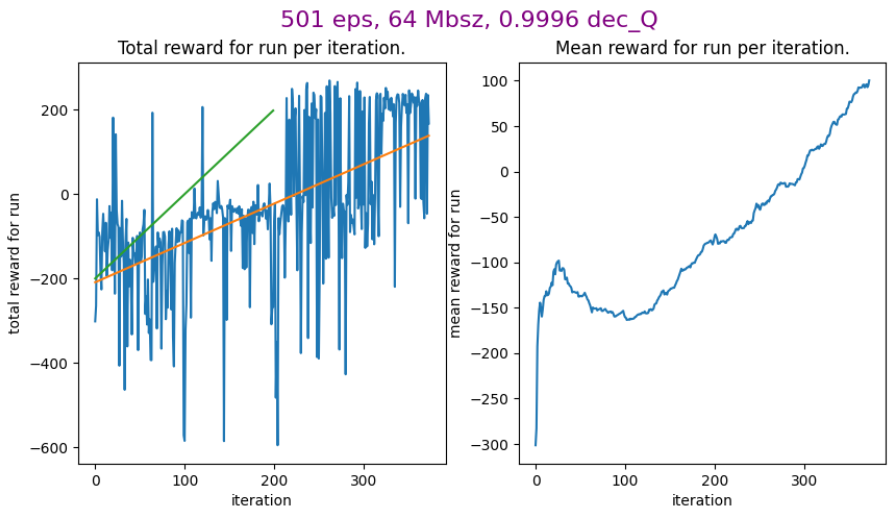